### **Things to do**
- [ ] Code Explanation
- [ ] (Optional) Convert the .ipynb to .py
- [ ] Presentation
- [x] Import Images as Separate Directory
- [x] Use os to Import the Images Rather Than Hard Coding It
- [x] Conversion of RGB to Grayscale
- [x] Cropping the Image to Only Manipulation Zone
- [x] K-Means Clustering
- [x] Evaluation Metrics
- [x] Distance Transform
- [x] Slicing and Distinguishing the Patches

In [5]:
# Importing the image and visualizing it.

import cv2
import os
import pandas as pd

root_repo = os.path.dirname(os.path.abspath('/home/lil-e-va/Downloads/ML_project/empty_-_detection_ML/data'))
img_path = os.path.join(root_repo,'data/image_001.jpg')
img_path = os.path.normpath(img_path)

if not os.path.exists(img_path):
    raise FileNotFoundError(f"Image file not found at: {img_path}")


image = cv2.imread(img_path,0)
print(f'The size of the image: {image.shape}')


cv2.imshow('Original',image)
cv2.waitKey(0)

cv2.destroyAllWindows()

The size of the image: (480, 640)


In [6]:
'''
Cropping the image
ref - https://learnopencv.com/cropping-an-image-using-opencv/
'''

cropped_image = image[150:410,30:640]
print(cropped_image.shape)
cv2.imshow("cropped", cropped_image)
cv2.imwrite("cropped_image.jpg",cropped_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

(260, 610)


### _Image Segmentation with K-means_

In [7]:
'''
Image Segmentation with Kmeans
ref - https://www.kaggle.com/code/hal1001k/image-segmentation-with-kmeans
'''

from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np

In [8]:
'''
kmeans - Clustering
ref - https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html#kmeans-opencv

flatten() - return a copy of a given array in such a way that it is collapsed into one dimension.

'''

img = cv2.cvtColor(cropped_image,cv2.COLOR_GRAY2RGB)

vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 2
attempts = 10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

label = label.flatten()

The collection of cluster that belongs to 0: 
[[ 47.  47.  47.]
 [ 52.  52.  52.]
 [102. 102. 102.]
 ...
 [108. 108. 108.]
 [108. 108. 108.]
 [108. 108. 108.]]
A: 9909	B: 148691
center: 
[[ 64.49248  64.49248  64.49248]
 [152.50786 152.50786 152.50786]]


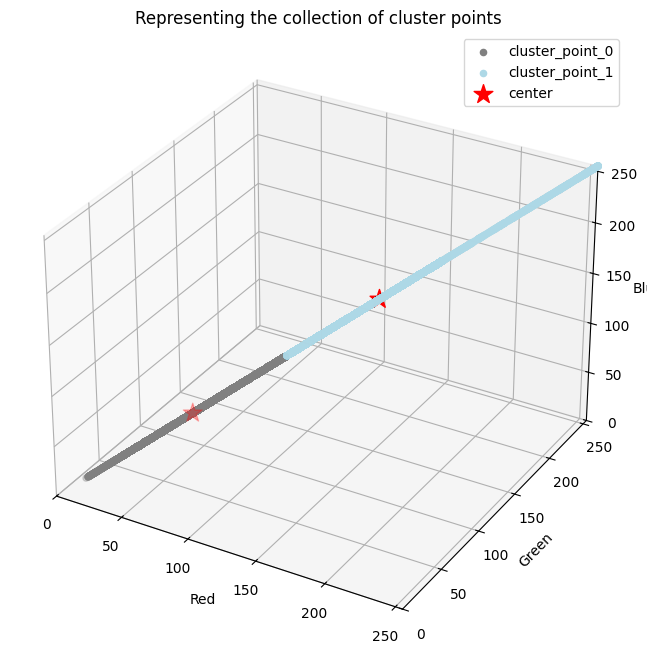

In [9]:
'''
Plotting a graph to represent the data

ref - https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/
'''

import numpy as np
import matplotlib.pyplot as plt

clusters = np.unique(label)  # Get unique cluster labels i.e., [0,1,2] 
cluster_points = {cluster: [] for cluster in clusters}  # Dictionary to store points per cluster

for cluster_id in clusters:
    cluster_points[cluster_id] = vectorized[label == cluster_id]

print(f'The collection of cluster that belongs to 0: \n{cluster_points[0]}')  # Points in cluster 0
A = cluster_points[0]
B = cluster_points[1]
# C = cluster_points[2]

print(f'A: {len(A)}\tB: {len(B)}')
print(f'center: \n{center}')


fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter(A[:,0],A[:,1],A[:,2],c='grey',label='cluster_point_0')
ax.scatter(B[:,0],B[:,1],B[:,2],c='lightblue',label='cluster_point_1')
# ax.scatter(C[:,0],C[:,1],C[:,2],c='purple',label='cluster_point_2')
ax.scatter(center[:,0],center[:,1],center[:,2],s=200,c='red',marker='*',label="center")




ax.set_xlim([0,255])
ax.set_ylim([0,255])
ax.set_zlim([0,255])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title("Representing the collection of cluster points")
ax.legend()



result image: (260, 610, 3)


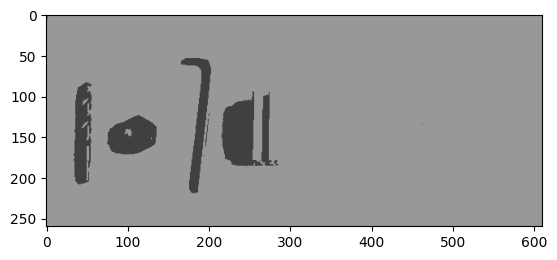

In [11]:
center = np.uint8(center)
res = center[label]
result_image = res.reshape((img.shape))

print(f'result image: {result_image.shape}')

plt.imshow(result_image)
plt.show()

### _Comparing Original and Segmented Image_

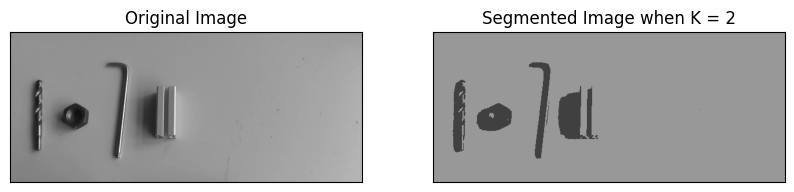

In [12]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

### _Evaluation Metrics_

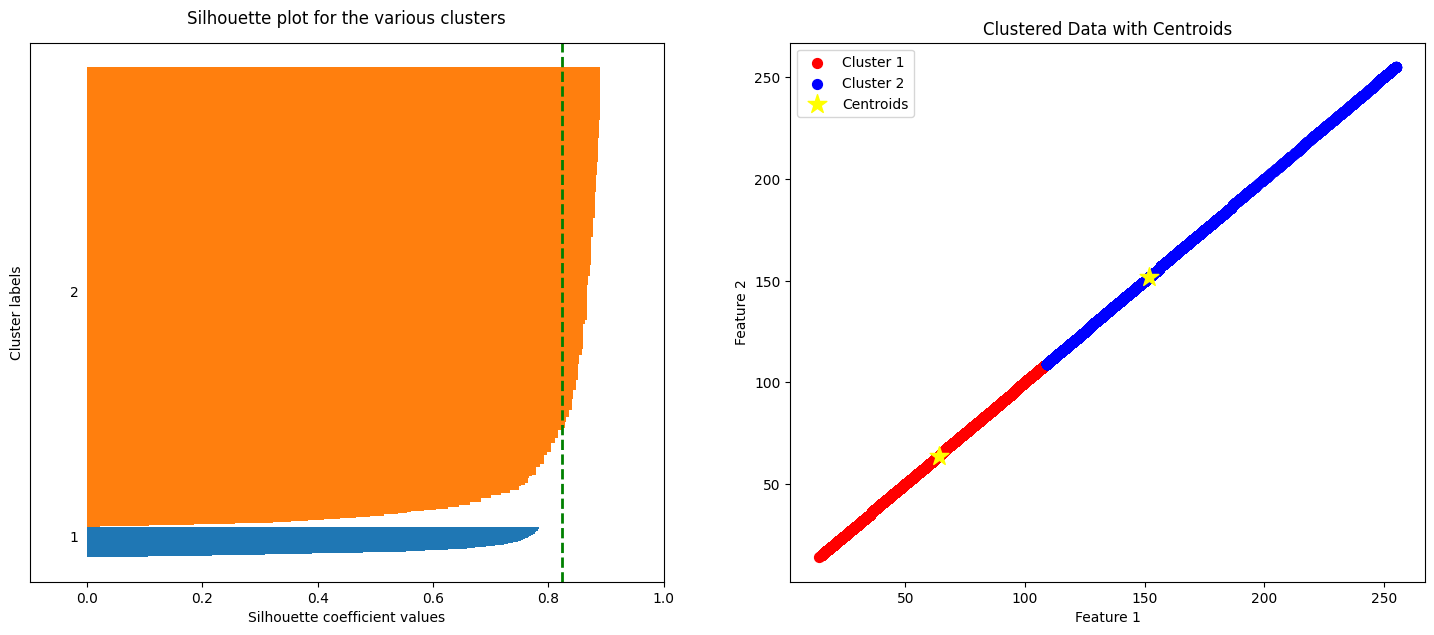

In [13]:
'''
Silhouette Method
'''

label = label.flatten()  # Flatten labels array

# Compute silhouette values
silhouette_vals = silhouette_samples(vectorized, label)

# Plot silhouette analysis
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(label)):
    cluster_silhouette_vals = silhouette_vals[label == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Plot the average silhouette score
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02)

# Scatter plot of the clusters
colors = ['red', 'blue', 'green']
for i, cluster in enumerate(np.unique(label)):
    cluster_data = vectorized [label == cluster]
    ax2.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, color=colors[i], label=f'Cluster {i + 1}')
ax2.scatter(center[:, 0], center[:, 1], s=200, color='yellow', marker='*', label='Centroids')
ax2.set_title('Clustered Data with Centroids')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

plt.show()


[308565277.3161238, 92596538.92651606, 49171575.71164367, 32496073.83468898, 24330505.977245588, 16759680.275125835, 11696455.517940145, 9048354.690121531, 7389865.1383319795, 6132311.718389377]


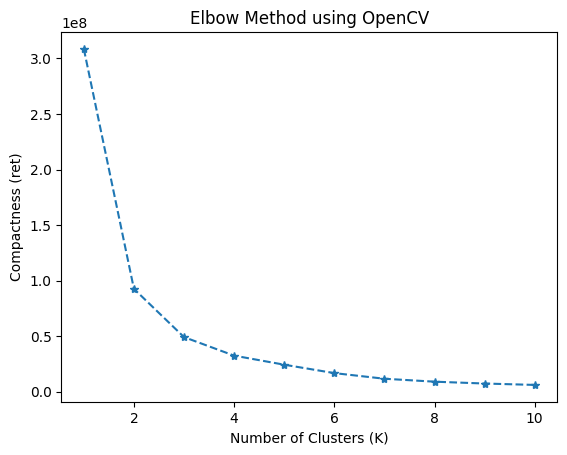

In [ ]:
'''
Evaluation Metrics
    1. Elbow Method 
    2. Silhouette Method
ref - https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

'''

### --- Elbow Method --- ###

compactness_values=[] # Sum of squared distance b/w data pair points and their assigned clusters
list_k = list(range(1,11))

for k in list_k:
    ret,label,center = cv2.kmeans(vectorized,k,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
    compactness_values.append(ret)

plt.figure()
plt.plot(list_k, compactness_values,marker='*',linestyle='--')
plt.title('Elbow Method using OpenCV')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Compactness (ret)')
plt.show()




### _Distance Transform_


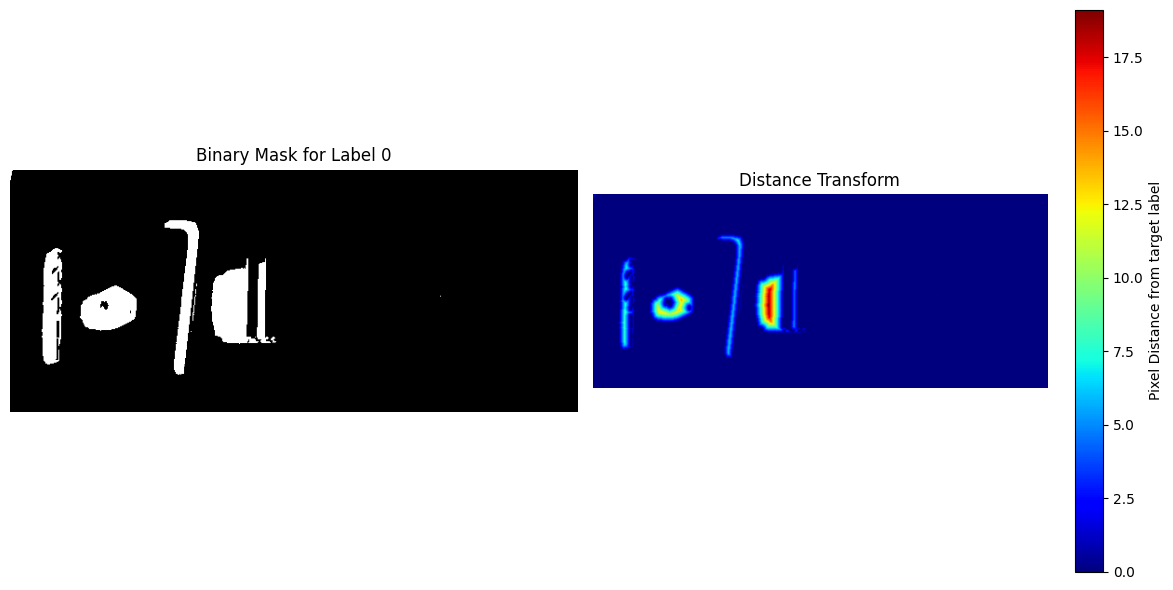

In [15]:
'''
Distance Transform is used to find the distance for only a spcific label from the segmented image.
ref - https://www.geeksforgeeks.org/python-opencv-distancetransform-function/
'''

if len(A) < len(B):
    target_label = 0
else:
    target_label = 1

binary_mask = (label == target_label).astype(np.uint8).reshape(-1, 1) 

original_height, original_width = 260, 610
binary_mask = binary_mask.reshape(original_height, original_width)

# Computing the distance transform
distance_map = cv2.distanceTransform(binary_mask, cv2.DIST_L2, 3)

# Plot the binary mask and the distance transform
plt.figure(figsize=(12, 6))

# Binary Mask
plt.subplot(1, 2, 1)
plt.imshow(binary_mask, cmap='gray')
plt.title(f'Binary Mask for Label {target_label}')
plt.axis('off')

# Distance Transform
plt.subplot(1, 2, 2)
plt.imshow(distance_map, cmap='jet')
plt.title('Distance Transform')
plt.colorbar(label='Pixel Distance from target label')
plt.axis('off')

plt.tight_layout()
plt.show()


5


(np.float64(-0.5), np.float64(609.5), np.float64(259.5), np.float64(-0.5))

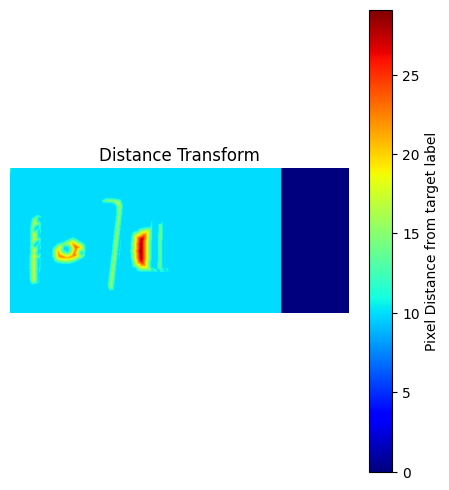

In [16]:
'''
Creating patches to identify the free space from the distance transform
'''
c = distance_map.shape[1]

col = 0
for i in range(1,6):
    end_col = int(i*(c/5))
    
    if(np.all(distance_map[:, col:end_col]==0)):
        print(i)

    else:

        distance_map[:, col:end_col] += 10

    col = end_col


plt.figure(figsize=(12, 6))


# Distance Transform
plt.subplot(1, 2, 2)
plt.imshow(distance_map, cmap='jet')
plt.title('Distance Transform')
plt.colorbar(label='Pixel Distance from target label')
plt.axis('off')